# Evaluating accuracy for cross_val_score and train_test_split

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [20]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 4)
from sklearn.cross_validation import cross_val_score

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [34]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [22]:
scores = cross_val_score(knn,X,y,cv = 10,scoring = 'accuracy')
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [35]:
#cross_val_score
scores.mean()

0.96666666666666679

In [36]:
#train_test_split
from sklearn import metrics
print metrics.accuracy_score(y_pred,y_test)

0.947368421053


# Plotting accuracy for different values of n_neighbors in KNN

In [66]:
k_range = range(1,16)
k_scores = []
for k in k_range:
    knn_var = KNeighborsClassifier(n_neighbors = k)
    new_scores = cross_val_score(knn_var, X, y, cv = 10, scoring = 'accuracy')
    k_scores.append(new_scores.mean())
print k_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338]


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

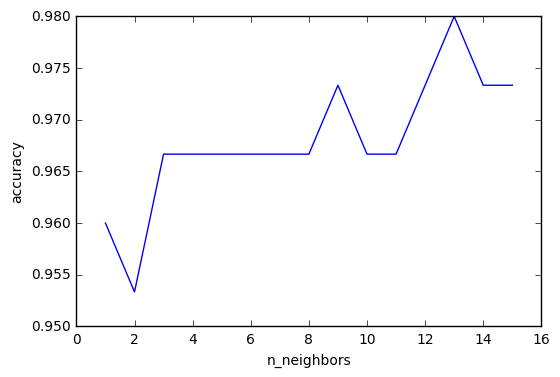

In [60]:
plt.plot(k_range,k_scores)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

<Container object of 15 artists>

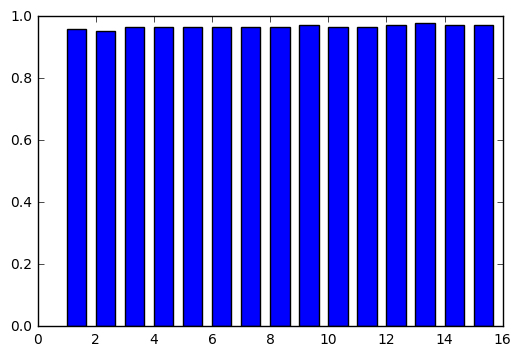

In [65]:
width = 1/1.5
plt.bar(k_range,k_scores,width,color = "blue")